In [1]:
!pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512614 sha256=228e21234a6b620750cb10378f95a3b150ce078f0d9014d2b471c4319e22e9d6
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [2]:
import pandas as pd
import torch
import os
import librosa
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw

from scipy import stats


In [3]:
PROJECT_PATH = "/content/drive/MyDrive/Colab Notebooks/Project"
pca = PCA(n_components=2)

In [4]:
gen_path = f'{PROJECT_PATH}/Audible-Visual/musicgen/random_similar_output/8s_audio'
ref_path = f'{PROJECT_PATH}/IMEMNet/cut_audio'
# files = list(map(lambda x : x.split(".")[0],os.listdir(AUDIO_PATH)))

In [5]:
def d(audio_feat1, audio_feat2):

  res = np.sqrt(np.sum((audio_feat1 - audio_feat2)**2))

  return res

In [6]:
pairs_df = pd.read_csv(f'{PROJECT_PATH}/Audible-Visual/random_similar_subsample.csv')

In [11]:

x=[]
y=[]
points_skip=0
for row in pairs_df.iterrows():
  rec = row[1]
  audio_ref_path = f'{ref_path}/{rec.WAV_FILE}.wav'
  audio_gen_path = f'{gen_path}/{rec.IMG_FILE}.wav'
  sim = rec.score

  ref_x,ref_sr = librosa.load(audio_ref_path)
  gen_x,gen_sr = librosa.load(audio_gen_path)

  mfcc_ref = librosa.feature.mfcc(y=ref_x, sr=ref_sr, n_mfcc=20).reshape(-1)
  mfcc_gen = librosa.feature.mfcc(y=gen_x, sr=gen_sr, n_mfcc=20).reshape(-1)

  s_dist, _ = fastdtw(mfcc_ref, mfcc_gen, dist=d)

  if sim >0.85 and s_dist >140000:
    points_skip +=1
    continue
  x.append(sim)
  y.append(s_dist)


print(points_skip)


4


In [12]:
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope

-1785.066431953205

In [13]:
def curve(x):
  return slope*x + intercept

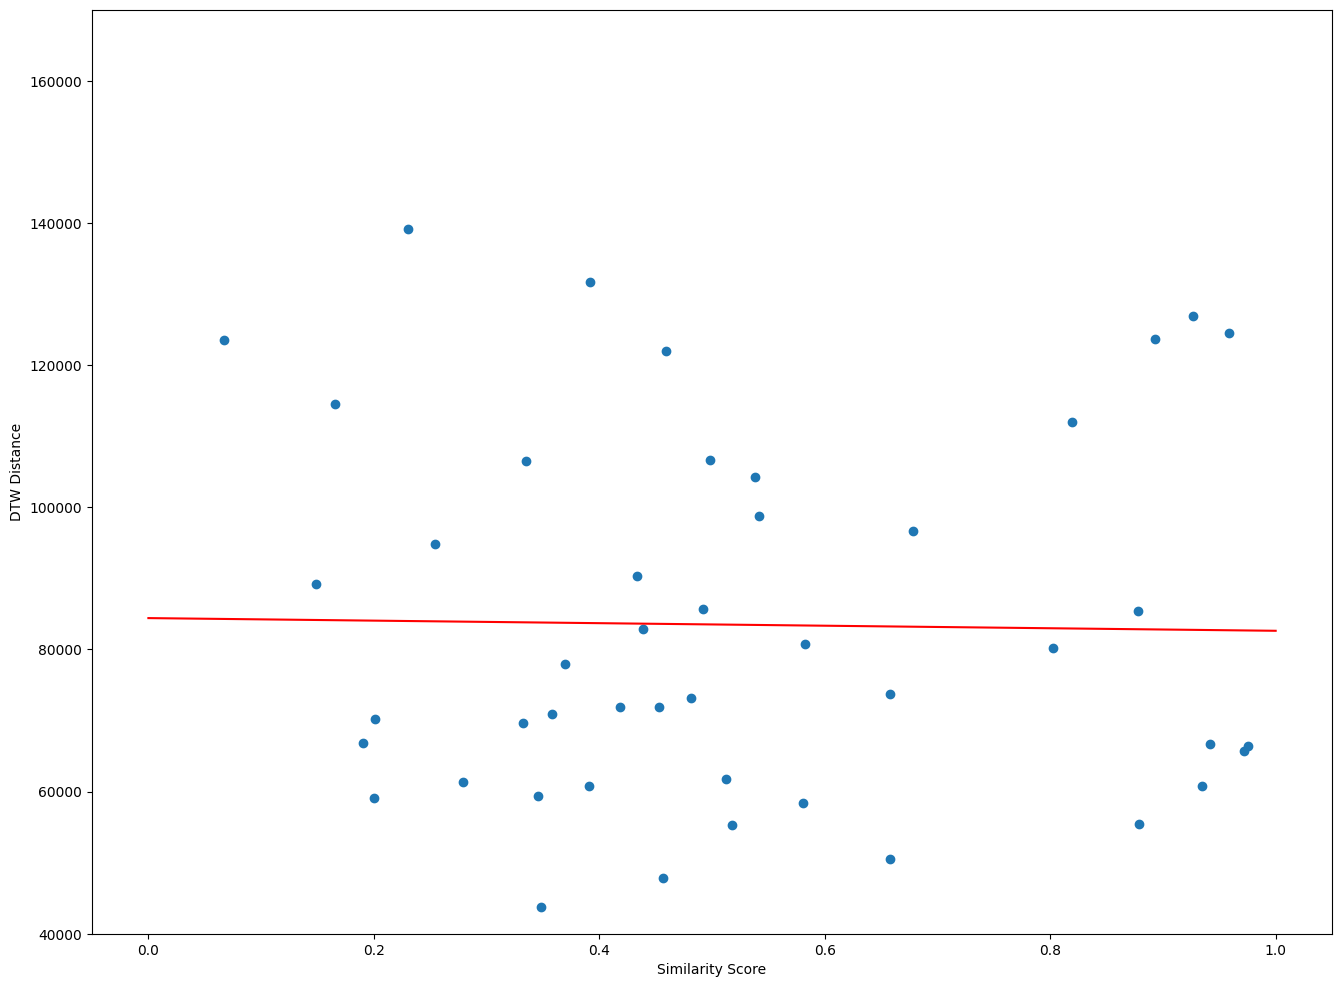

In [14]:
fig,ax = plt.subplots(figsize=(16,12))
ax.scatter(x, y)
ax.plot([0,1],[curve(0),curve(1)],c="red")
ax.set_xlabel("Similarity Score")
ax.set_ylabel("DTW Distance")
ax.set_ylim([40000,170000])
plt.show()